# Seaborn 
Existen muchos proced graficos estandar, y son entregas rapidas de resultados. Seaborn es una libreria que prentende simplificar la entrega de graficos con buenas practicas

In [1]:
# imports clásicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# importamos nuestro archivo con funciones auxiliares
import lec4_graphs as gfx
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(8,6)

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

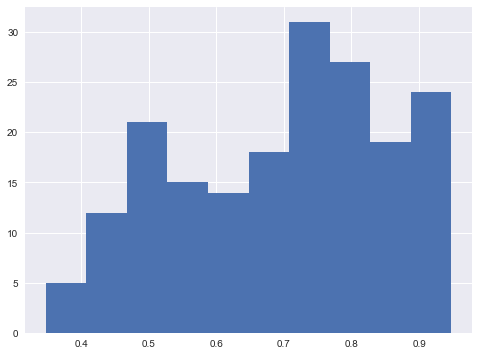

In [3]:
plt.hist(df.undp_hdi.dropna())

/Users/santi/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santi/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del IDH')

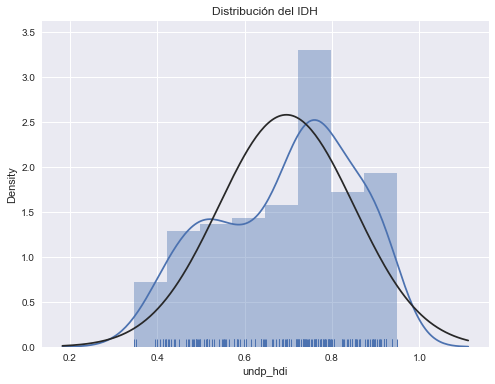

In [4]:
sns.distplot(df.undp_hdi.dropna(), rug=True, fit=stats.norm)
plt.title("Distribución del IDH")

In [5]:
list_numero=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list_nombre=['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean' ]
dict_ht_region=dict(zip(list_numero,list_nombre))
df.ht_region.replace(dict_ht_region, inplace=True)
df['region_recod']=df.ht_region

<AxesSubplot:xlabel='count', ylabel='region_recod'>

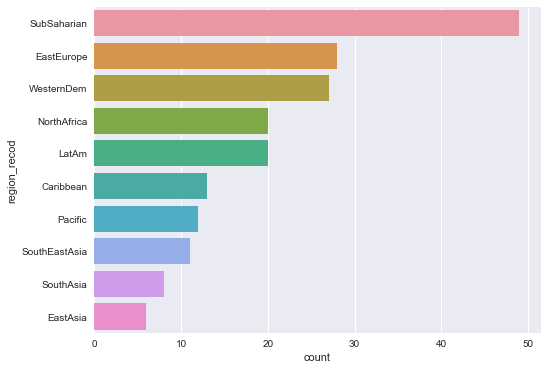

In [6]:
sns.countplot(y=df.region_recod, order=df.region_recod.value_counts().index)

In [7]:
df['demo']=np.where(df.gol_inst<=2,'Demoracia','No democracia')

<AxesSubplot:xlabel='count', ylabel='region_recod'>

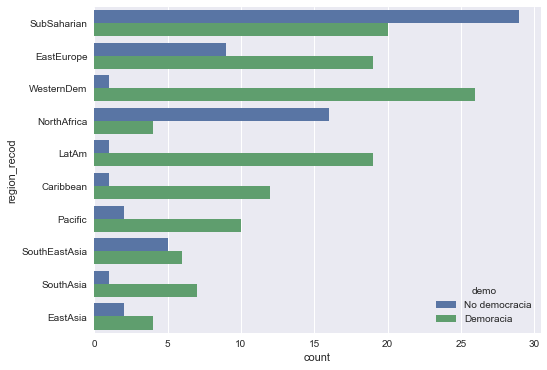

In [8]:
sns.countplot(y=df.region_recod, hue=df.demo ,order=df.region_recod.value_counts().index)

/Users/santi/miniforge3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='undp_hdi', ylabel='region_recod'>

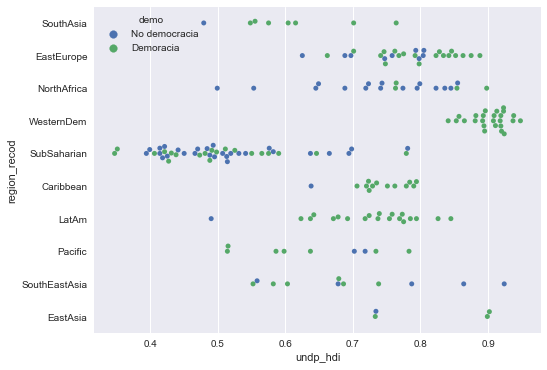

In [9]:
sns.swarmplot(y=df.region_recod, x=df.undp_hdi, hue=df.demo)

/Users/santi/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santi/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santi/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

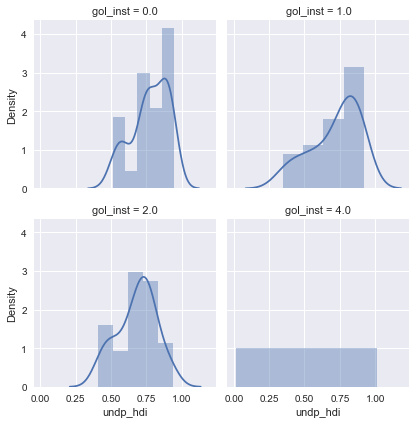

In [10]:
grid = sns.FacetGrid(df, col='gol_inst', col_wrap=2)
grid = grid.map(sns.distplot, 'undp_hdi')

Text(0, 0.5, 'Calidad de gobierno')

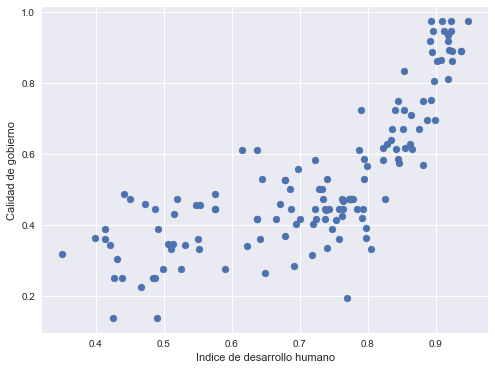

In [11]:
plt.scatter(x=df.undp_hdi,y=df.icrg_qog)
plt.xlabel('Indice de desarrollo humano')
plt.ylabel('Calidad de gobierno')

In [12]:
scatter_data=df.loc[:,['undp_hdi','icrg_qog','ccodealp']].dropna()

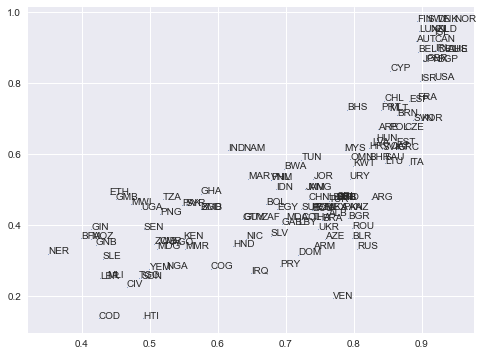

In [13]:
fig, ax=plt.subplots()

ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'],marker='.',s=1)

for i in scatter_data.index:
    ax.text(scatter_data.loc[i,'undp_hdi'],scatter_data.loc[i,'icrg_qog'], str(scatter_data.loc[i,'ccodealp']))